C:\Users\OMKAR\AppData\Local\Temp\ipykernel_25252\1046914247.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_entries['date_only'] = pd.to_datetime(selected_entries['date_only'],
C:\Users\OMKAR\AppData\Local\Temp\ipykernel_25252\1046914247.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_entries_filter['month'] = selected_entries_filter['date_only'].dt.month


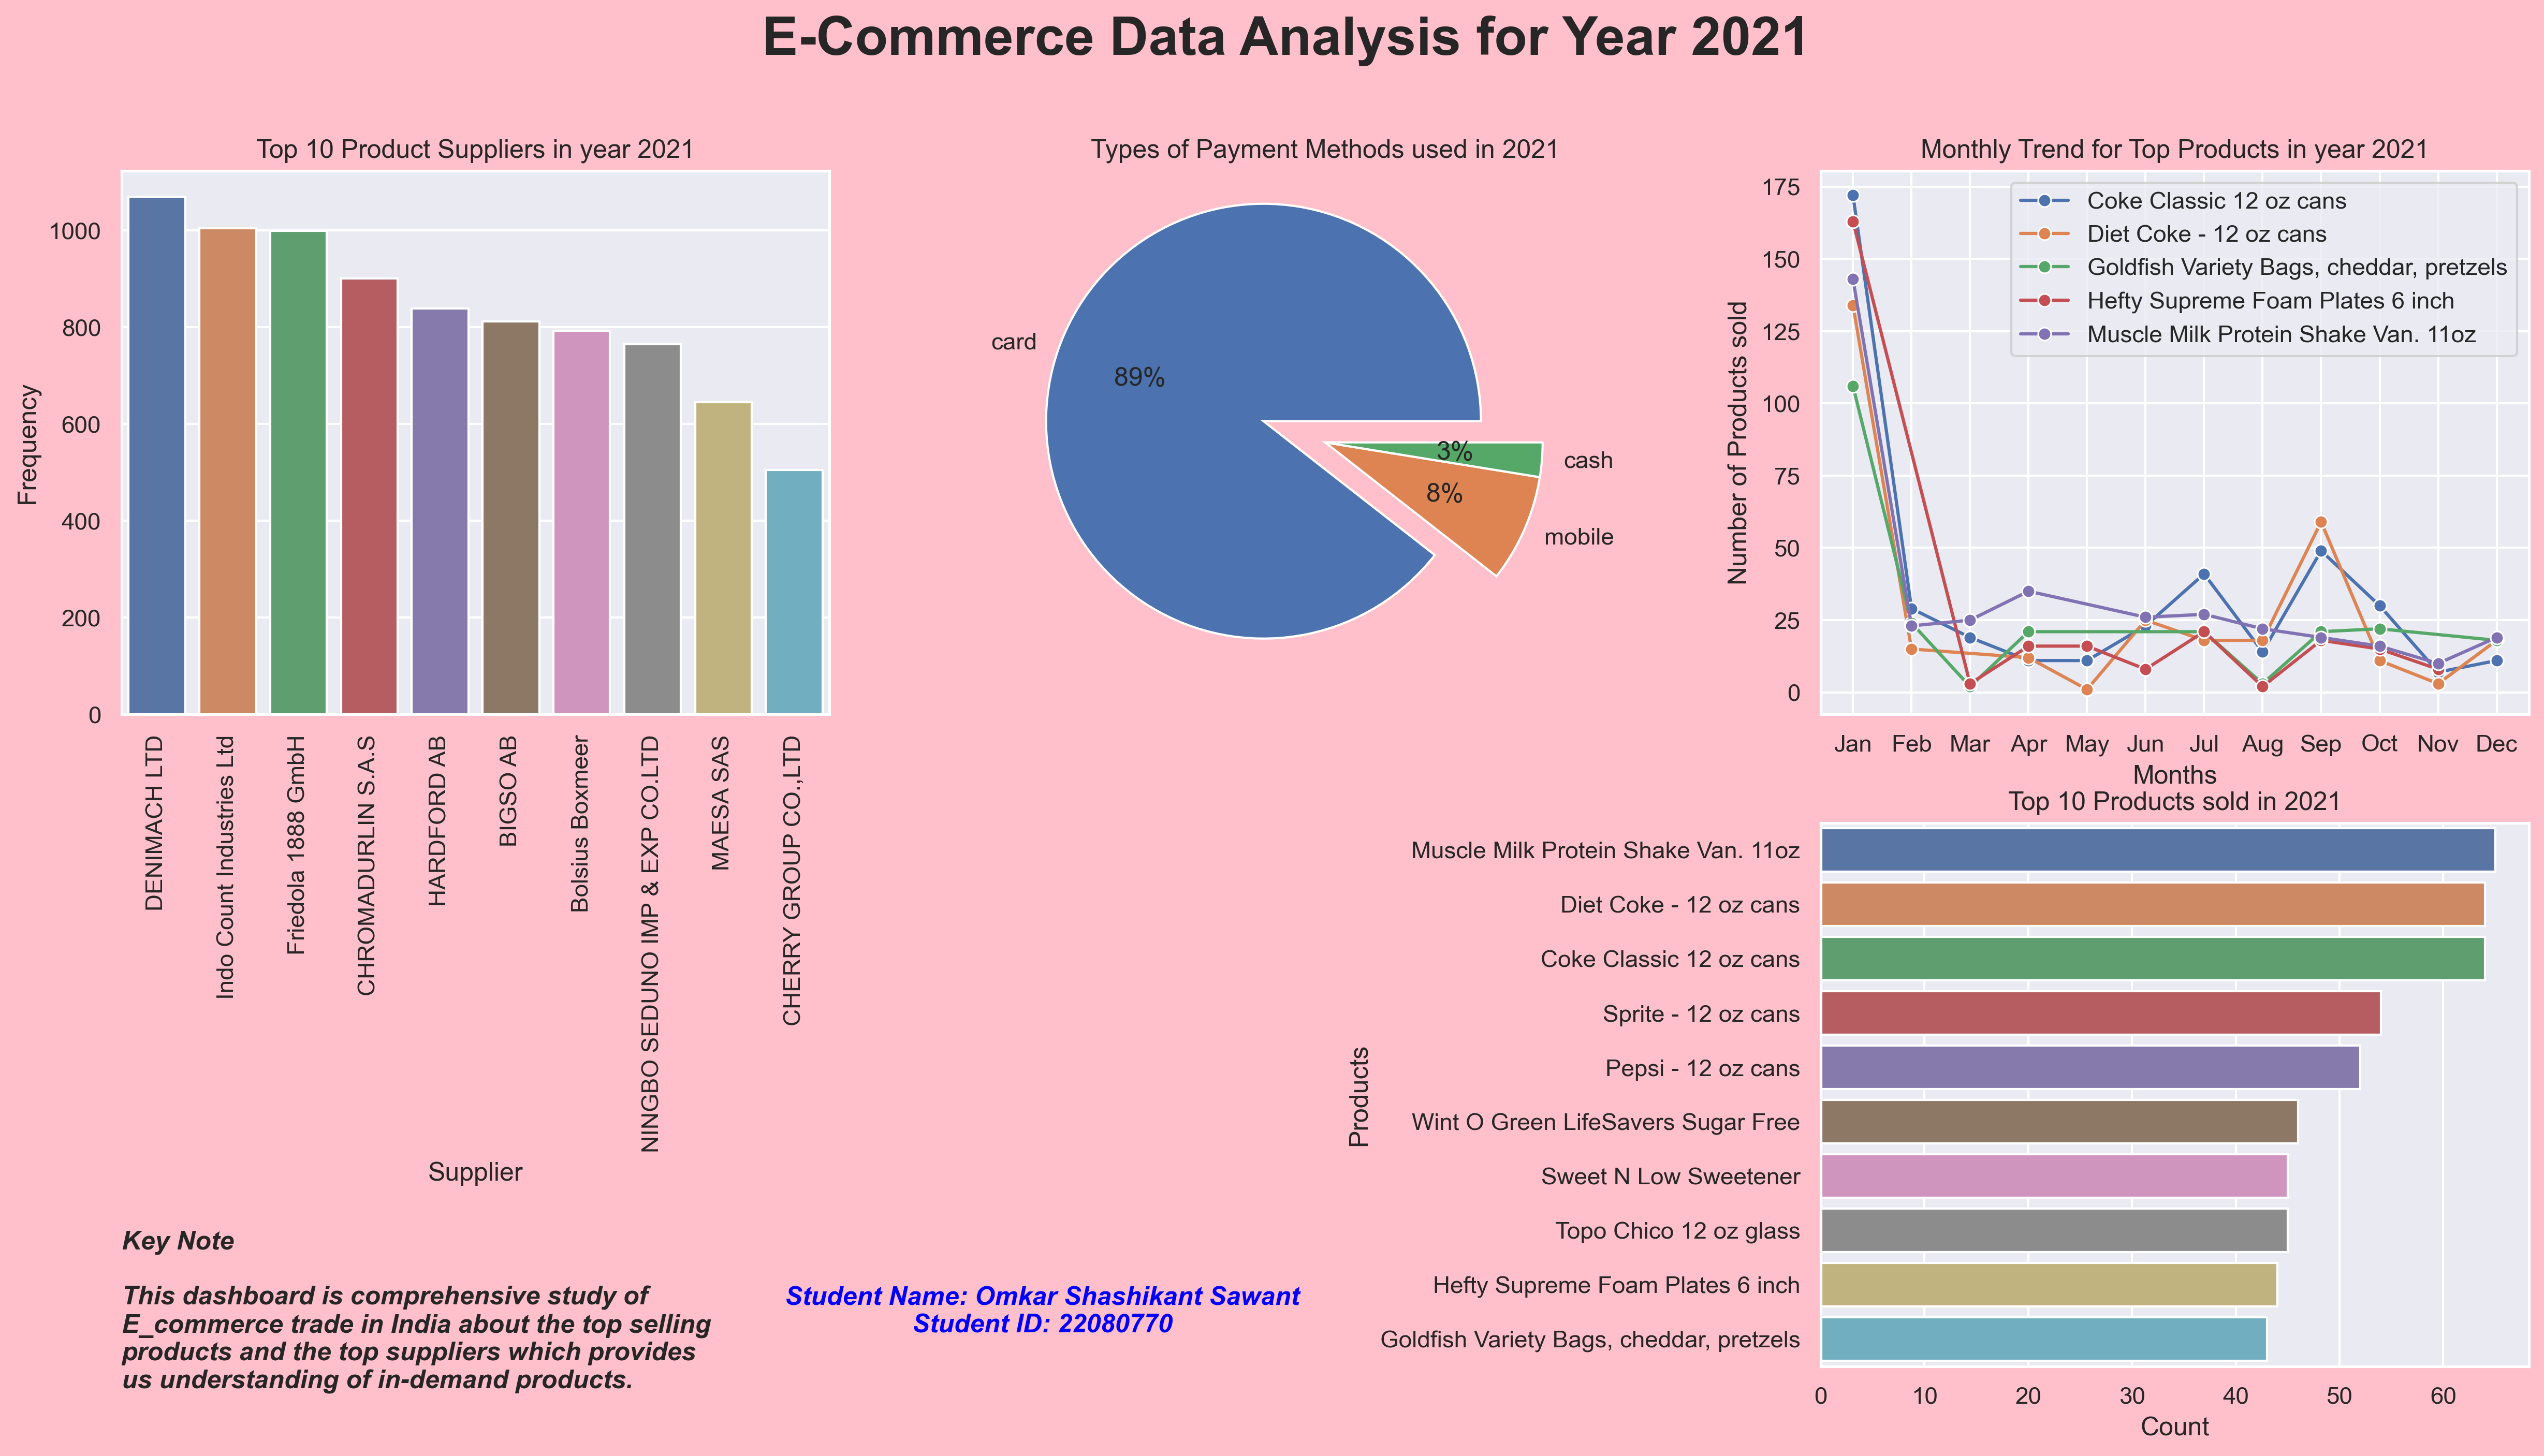

'\nhttps://github.com/OmkarSawant23/DHV_infographics_project\n\n'

In [2]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec


def file_name():
    '''
    This function is used for reading the dataset csv file and to perform data
    manipulation operations as per requirement.

    Returns
    -------
    merged_df : pandas dataframe
        This is combined dataframe of all files which were used.
    merged_df_sorted : pandas dataframe
        This is sorted dataframe according to the year.
    selected_entries : pandas dataframe
        This dataframe only consists entries from year 2021.
    selected_year : variable
        Used for selecting year.

    '''
    # Reading all files.
    customer = pd.read_csv("customer_dim1.csv")
    item = pd.read_csv("item_dim1.csv")
    store = pd.read_csv("store_dim1.csv")
    time = pd.read_csv("time_dim1.csv")
    trans = pd.read_csv("Trans_dim1.csv")
    fact = pd.read_csv("fact_table1.csv")

    # merging files together.
    merged_df = pd.merge(customer, fact, on='coustomer_key', how='left')
    merged_df = pd.merge(merged_df, item, on='item_key', how='left')
    merged_df = pd.merge(merged_df, store, on='store_key', how='left')
    merged_df = pd.merge(merged_df, time, on='time_key', how='left')
    merged_df = pd.merge(merged_df, trans, on='payment_key', how='left')

    # Sorting the data by year.
    merged_df['date'] = pd.to_datetime(merged_df['date'])
    merged_df_sorted = merged_df.sort_values(by='date')
    merged_df_sorted['date_only'] = merged_df_sorted['date'].dt.date
    merged_df_sorted = merged_df_sorted.drop(columns=['date'])
    selected_year = 2021
    selected_entries = merged_df_sorted[merged_df_sorted.year == selected_year]

    return merged_df, merged_df_sorted, selected_entries, selected_year


def bar_plot(selected_entries, grid):
    '''
    This function creates bar plot using given data.

    Parameters
    ----------
    selected_entries :  pandas dataframe
        This dataframe only consists entries from year 2021.
    grid : subplot
        Divides plots into subplots and deciding the position.

    Returns
    -------
    None.

    '''

    # Creating a subplot to show top 10 suppliers in 2021.
    plt.subplot(grid[0, 0])
    top_sup = selected_entries['supplier'].value_counts().nlargest(10)
    sns.barplot(x=top_sup.index, y=top_sup)
    # Adding title, labels for x and y.
    plt.title("Top 10 Product Suppliers in year 2021")
    plt.xlabel("Supplier")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)


def pie_plot(selected_entries, grid):
    '''
    This function creates pie plot using given data.


    Parameters
    ----------
    selected_entries : pandas dataframe
        This dataframe only consists entries from year 2021.
    grid :  subplot
        Divides plots into subplots and deciding the position.


    Returns
    -------
    None.

    '''
    # Creating a subplot to show most ued payment method in 2021.
    plt.subplot(grid[0, 1])
    # Used for counting transaction type.
    trans = selected_entries['trans_type'].value_counts()
    # setting transaction type as index.
    top_trans_names = trans.index
    top_trans_counts = trans.values
    # to make it stand out.
    explode = [0.3, 0, 0]
    # plotting pie chart.
    plt.pie(top_trans_counts, labels=top_trans_names,
            autopct='%1.0f%%', explode=explode)
    # Adding title
    plt.title('Types of Payment Methods used in 2021')


def lineplot_monthly(selected_entries, grid):
    '''
    This function creates line plot using given data.


    Parameters
    ----------
    selected_entries : pandas dataframe
        This dataframe only consists entries from year 2021.
    grid : subplot
        Divides plots into subplots and deciding the position.


    Returns
    -------
    None.

    '''
    # Creating a subplot to show count of top sold items in 2021 by every month.
    plt.subplot(grid[0, 2])
    top_sup = selected_entries['item_name'].value_counts().nlargest(10)
    # converting string value to date time format.
    selected_entries['date_only'] = pd.to_datetime(selected_entries['date_only'],
                                                   format='%Y-%m-%d')
    selected_entries_filter = selected_entries.loc[selected_entries
                                                   ["item_name"].isin(top_sup.index)]
    # filtering based on months.
    selected_entries_filter['month'] = selected_entries_filter['date_only'].dt.month
    # combining month and quantity of items sold.
    table = pd.pivot_table(selected_entries_filter, values='quantity',
                           index=['item_name'],
                           columns=['month'], aggfunc="sum")
    # creating the line plot for top sold item and their count in each month.
    sns.lineplot(y=table.iloc[0, :].values, x=table.columns,
                 marker='o', label=table.index[0])
    sns.lineplot(y=table.iloc[1, :].values, x=table.columns,
                 marker='o', label=table.index[1])
    sns.lineplot(y=table.iloc[2, :].values, x=table.columns,
                 marker='o', label=table.index[2])
    sns.lineplot(y=table.iloc[3, :].values, x=table.columns,
                 marker='o', label=table.index[3])
    sns.lineplot(y=table.iloc[4, :].values, x=table.columns,
                 marker='o', label=table.index[4])
    # Adding title,legend,labels.
    plt.title('Monthly Trend for Top Products in year 2021')
    plt.legend()
    plt.xlabel('Months')
    plt.ylabel('Number of Products sold')
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


def bar_plot_one(selected_entries, grid):
    '''
    This function creates bar plot using given data.

    Parameters
    ----------
    selected_entries : pandas dataframe
        This dataframe only consists entries from year 2021.
    grid : subplot
        Divides plots into subplots and deciding the position.


    Returns
    -------
    None.

    '''
    # Creating a subplot to show count of top 10 sold items in 2021.
    plt.subplot(grid[1, 2])
    # Count of top sold items.
    top_item = selected_entries['item_name'].value_counts().nlargest(10)
    sns.barplot(x=top_item, y=top_item.index)
    # Adding title and labels.
    plt.title("Top 10 Products sold in 2021")
    plt.xlabel("Count")
    plt.ylabel("Products")


def data_info():
    '''
    This function returns all texts on the plots including heading.

    Returns
    -------
    None.

    '''
    # Creating a subplot to show key notes for dashboard.
    plt.subplot(grid[1, 0])
    text = "Key Note\n\n"\
        "This dashboard is comprehensive study of\n"\
        "E_commerce trade in India about the top selling\n"\
        "products and the top suppliers which provides\n"\
        "us understanding of in-demand products."
    plt.text(0.0, 0.1, text, ha='left', va='center', fontsize=12,
             fontstyle='italic', fontweight='bold')
    plt.axis('off')
    # Creating a subplot to show name and student id.
    plt.subplot(grid[1, 1])
    text = "Student Name: Omkar Shashikant Sawant\n" \
        "Student ID: 22080770"
    plt.text(0.1, 0.1, text, ha='center', va='center', fontsize=12,
             color="blue", fontstyle='italic', fontweight='bold')
    plt.axis('off')
    # Adding title of the dashboard.
    fig.suptitle('E-Commerce Data Analysis for Year 2021',
                 fontsize=25, fontweight='bold')


###########################Main Function###############################
merged_df, merged_df_sorted, selected_entries, selected_year = file_name()
merged_df.to_csv('merged_data.csv', index=False)
merged_df_sorted.to_csv('sorted_data.csv', index=False)
selected_entries.to_csv(f'selected_entries_{selected_year}.csv', index=False)
# setting theme for graphs.
sns.set_theme()
# plotting infographics dashboard.
fig = plt.figure(figsize=(20, 10), dpi=300)
# setting background colour.
fig.patch.set_facecolor("pink")
grid = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
bar_plot(selected_entries, grid)
pie_plot(selected_entries, grid)
lineplot_monthly(selected_entries, grid)
bar_plot_one(selected_entries, grid)
data_info()
# saving the dashboard as png.
#fig.savefig("22080770.png", dpi=300)
plt.show()
# git hub link
"""
https://github.com/OmkarSawant23/DHV_infographics_project

"""
